In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from hw1_1 import *
from sklearn.manifold import TSNE

In [2]:
val_loader = loadData('hw1_data/hw1_data/p1_data/val_50')

model = MyNetwork()
model.load_state_dict(torch.load('hw1_1_myNet.pth'))
model.eval().cuda()

for param in model.parameters():
    param.requires_grad = False

In [3]:
start = 1
for img, label in val_loader :
    output_pca = model.pca(img.cuda()).cpu().detach().numpy()
    labels = label.cpu().detach().numpy()
    if start :
        pca_data = output_pca
        label_data = labels
        start = 0
    else:
        pca_data = np.concatenate((pca_data,output_pca),axis=0)
        label_data = np.concatenate((label_data,labels),axis=0)

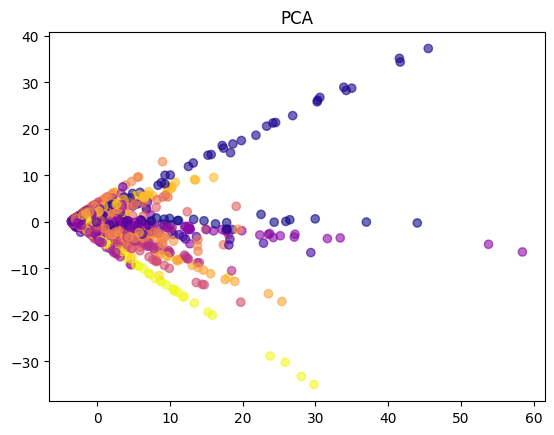

In [21]:
principal=PCA(n_components=2)
x = principal.fit_transform(pca_data.squeeze())
plt.title('PCA')
plt.scatter(x[:,0],x[:,1],c=label_data,cmap='plasma',alpha=0.6)

In [41]:
def tsne(model_select):
    pthname=['hw1_1_myNetFirst.pth','hw1_1_myNetMid.pth','hw1_1_myNet.pth']
    model = MyNetwork()
    model.load_state_dict(torch.load(pthname[model_select]))
    model.eval().cuda()

    for param in model.parameters():
        param.requires_grad = False
    
    start = 1
    for img, label in val_loader :
        output_tsne = model.pca(img.cuda()).cpu().detach().numpy()
        labels = label.cpu().detach().numpy()
        if start :
            tsne_data = output_tsne
            label_data = labels
            start = 0
        else:
            tsne_data = np.concatenate((tsne_data,output_tsne),axis=0)
            label_data = np.concatenate((label_data,labels),axis=0)
    x = TSNE(n_components = 2, perplexity = 40, n_iter = 300,init='pca').fit_transform(tsne_data.squeeze())
    if model_select == 0:
        plt.title('TSNE Start')
    elif model_select ==1:
        plt.title('TSNE Mid')
    else:
        plt.title('TSNE End')
    plt.scatter(x[:,0],x[:,1],c=label_data,cmap='plasma',alpha=0.6)

/home/heisenberg/.venvs/DLCVenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/heisenberg/.venvs/DLCVenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


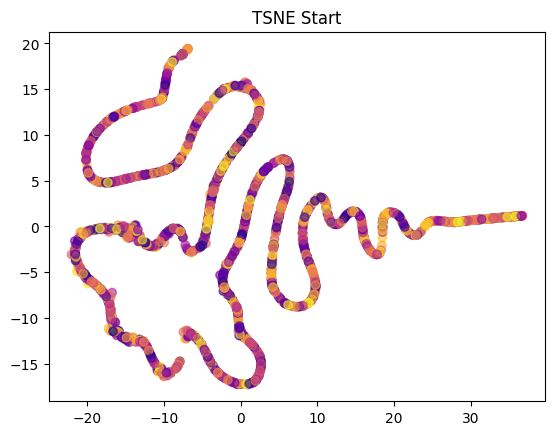

In [42]:
tsne(0)

/home/heisenberg/.venvs/DLCVenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/heisenberg/.venvs/DLCVenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


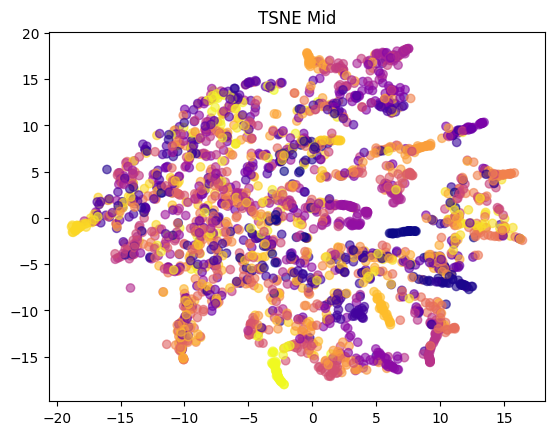

In [43]:
tsne(1)

/home/heisenberg/.venvs/DLCVenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/heisenberg/.venvs/DLCVenv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


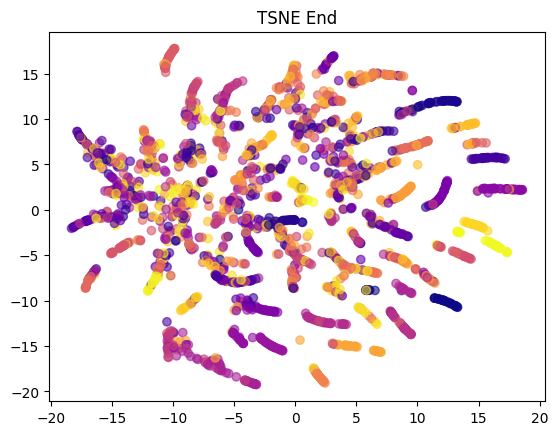

In [44]:
tsne(2)